In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
import seaborn as sns; sns.set()
from sympy import *
init_printing(use_unicode=True)
%matplotlib notebook

# Helper functions

In [2]:
# reads in data from a csv or txt file
# format is x1, x2, x3, y
# returns X, y

def read_data(data):
    pts = np.genfromtxt(data, delimiter=',')
    try:
        d = len(pts[0]) - 1
        n = len(pts)
        X = pts[:,:-1]
        y = pts[:,-1:]
    except:
        d = len(pts) - 1
        n = 1
        X = pts[:-1].reshape(n,d)
        y = pts[-1].reshape(n,1)
    return(X,y)

In [3]:
# reads in data from a 2d array
# format is [[x1,x2,x3,y], [x1,x2,x3,y]]
# returns X, y

def create_dataset(pts):
    try:
        d = len(pts[0]) - 1
        n = len(pts)
        X = pts[:,:-1]
        y = pts[:,-1:]
    except:
        d = len(pts) - 1
        n = 1
        X = pts[:-1].reshape(n,d)
        y = pts[-1].reshape(n,1)
    return(X,y)

In [4]:
# extends a given D=1, X, y with a given pt
# for now does not work for D > 1

def extend_ds_single(X, y, pt):
    newx, newy = pt[0], pt[1]
    X = np.append(X, [[newx]], axis=0)
    y = np.append(y, [[newy]], axis=0)
    return X, y

In [5]:
# stopgap solution for D > 1

def extend_ds_multidim(X, y, pt):
    # stopgap for now
    newx, newy = pt[:-1], pt[-1]
    X = np.append(X, [newx], axis=0)
    y = np.append(y, [[newy]], axis=0)
    return X, y

In [6]:
def quad_form(a,b,c):
    root_one = -b + math.sqrt(math.pow(a,2) - 4*a*c) / (2*a)
    root_two = -b - math.sqrt(math.pow(a,2) - 4*a*c) / (2*a)
    return(root_one, root_two)

In [7]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = min(0,x.min() - 1), x.max() + 1
    y_min, y_max = min(0,y.min() - 1), y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #out = ax.contourf(xx, yy, Z, **params)
    out = ax.plot_surface(xx,yy,Z)
    return out

In [47]:
X,y = create_dataset(np.array([[5,0], [5,10]]))

In [50]:
X_,y_ = create_dataset(np.array([[3,7], [3,3], [2,9], [2,1], [6,6], [6,4]]))

Text(0.5, 1.0, 'DS 2 : [0.]')

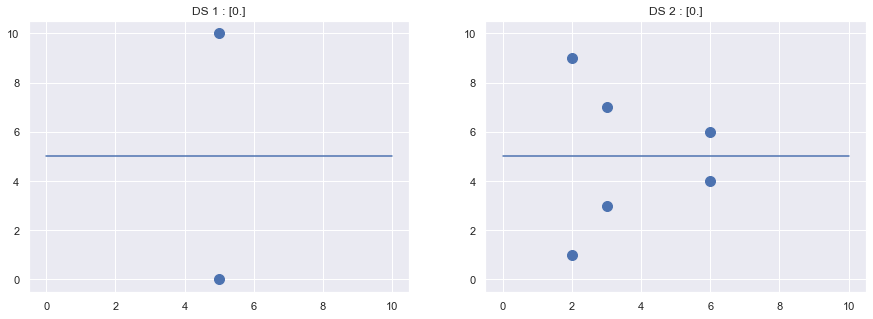

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(15,5))
ax1.scatter(X,y, s=100)
ax2.scatter(X_,y_,s=100)

ax = [ax1, ax2]

for x in ax:
    x.tick_params(labelbottom=True, labelleft=True)
    x.tick_params(labelbottom=True, labelleft=True)
    
lm = LinearRegression()

lm.fit(X,y)
x_values = 0, 10 # just stopgap for rn
y_values = [lm.intercept_ + lm.coef_[0] * x for x in x_values]
ax1.plot(x_values, y_values)
ax1.set_title("DS 1 : " + str(lm.coef_[0]))

lm.fit(X_,y_)
x_values = 0, 10 # just stopgap for rn
y_values = [lm.intercept_ + lm.coef_[0] * x for x in x_values]
ax2.plot(x_values, y_values)
ax2.set_title("DS 2 : " + str(lm.coef_[0]))

# Cases

### D = 1, N = 1, no intercept, N is known

\begin{align}
%%%%%%%%%%%%%%%% 1
(
\begin{bmatrix}
x^{(1)} & x^{(2)}
\end{bmatrix}
\begin{bmatrix}
x^{(1)} \\
x^{(2)}
\end{bmatrix}
)^{-}
(
\begin{bmatrix}
x^{(1)} & x^{(2)}
\end{bmatrix}
\begin{bmatrix}
y^{(1)} \\
y^{(2)}
\end{bmatrix}
)
& =
\beta^{(2)} \\
%%%%%%%%%%%%%%%% 2
(
\begin{bmatrix}
x^{(1)^2} + x^{(2)^2}
\end{bmatrix}
)^{-}
(
\begin{bmatrix}
x^{(1)}y^{(1)} + x^{(2)}y^{(2)}
\end{bmatrix}
)
& =
\beta^{(2)} \\
%%%%%%%%%%%%%%%% 3
\begin{bmatrix}
\frac{1}{x^{(1)^2} + x^{(2)^2}}
\end{bmatrix}
\begin{bmatrix}
x^{(1)}y^{(1)} + x^{(2)}y^{(2)}
\end{bmatrix}
)
& =
\beta^{(2)} \\
%%%%%%%%%%%%%%%% 4
x^{(1)}y^{(1)} + x^{(2)}y^{(2)} & = \beta^{(2)}x^{(1)^2} + \beta^{(2)}x^{(2)^2} \\
%%%%%%%%%%%%%%%% 5
x^{(1)}\beta^{(1)}x^{(1)} + x^{(2)} y^{(2)} & = \beta^{(2)}x^{(1)^2} + \beta^{(2)}x^{(2)^2} \\
%%%%%%%%%%%%%%%% 6
(\beta^{(2)} - \beta^{(1)})x^{(1)^2} + (\beta^{2}x^{(2)^2} - x^{(2)}y^{(2)}) & = 0
\end{align}

In [8]:
quad_form(.5,0,-8)

Text(0.5, 1.0, 'extended ds 2 : [2.]')

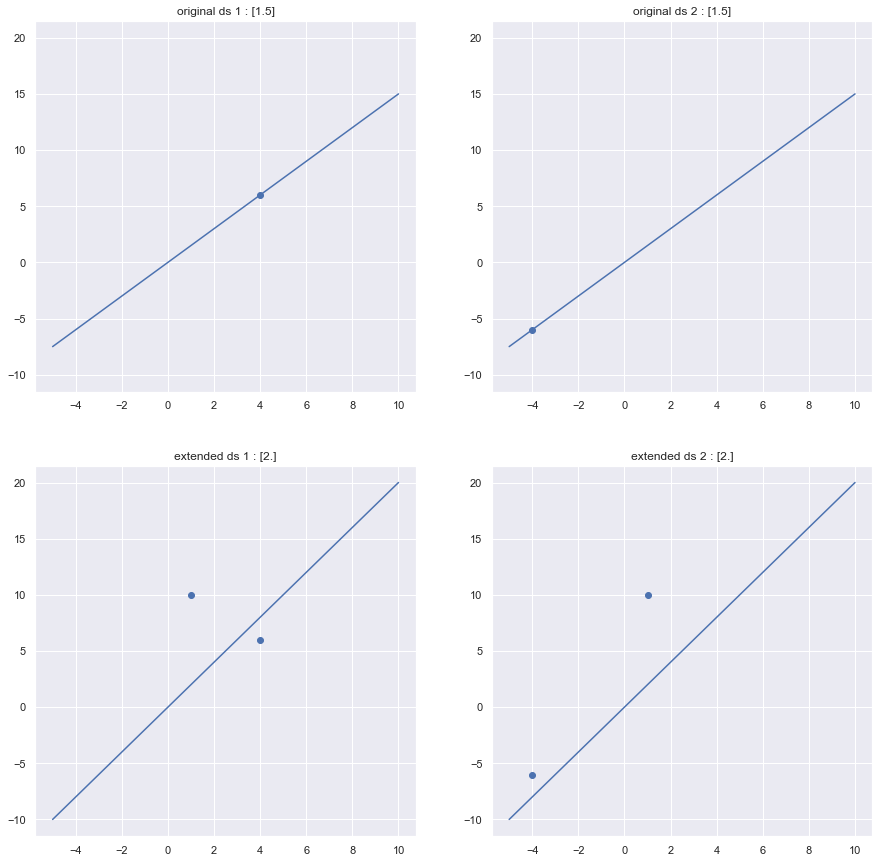

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,15))

ax = [ax1, ax2]

for x in ax:
    x[0].tick_params(labelbottom=True, labelleft=True)
    x[1].tick_params(labelbottom=True, labelleft=True)

lm = LinearRegression(fit_intercept=False)
pts = np.array([[4,6]])
X, y = create_dataset(pts)
lm.fit(X, y)

ax1[0].scatter(X,y)
#x_values = min([X.min() - 1, -1]), X.max() + 1
x_values = -5, 10 # just stopgap for rn
y_values = [lm.intercept_ + lm.coef_[0] * x for x in x_values]
ax1[0].plot(x_values, y_values)
ax1[0].set_title("original ds 1 : " + str(lm.coef_[0]))

exX, exy = extend_ds_single(X, y, (1,10))
lm.fit(exX, exy)

ax2[0].scatter(exX,exy)
#x_values = exX.min() - 1, exX.max() + 1
x_values = -5, 10 # just stopgap for rn
y_values = [lm.intercept_ + lm.coef_[0] * x for x in x_values]
ax2[0].plot(x_values, y_values)
ax2[0].set_title("extended ds 1 : " + str(lm.coef_[0]))

pts = np.array([[-4,-6]])
X, y = create_dataset(pts)
lm.fit(X, y)

ax1[1].scatter(X,y)
#x_values = X.min() - 1, X.max() + 1
x_values = -5, 10 # just stopgap for rn
y_values = [lm.intercept_ + lm.coef_[0] * x for x in x_values]
ax1[1].plot(x_values, y_values)
ax1[1].set_title("original ds 2 : " + str(lm.coef_[0]))

exX, exy = extend_ds_single(X, y, (1,10))
lm.fit(exX, exy)

ax2[1].scatter(exX,exy)
#x_values = exX.min() - 1, exX.max() + 1
x_values = -5, 10 # just stopgap for rn
y_values = [lm.intercept_ + lm.coef_[0] * x for x in x_values]
ax2[1].plot(x_values, y_values)
ax2[1].set_title("extended ds 2 : " + str(lm.coef_[0]))

### D = 2, N = 1, no intercept, N is known

In [10]:
X,y = create_dataset(np.array([[3,-1,2]]))

In [11]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [12]:
lm.coef_

array([[ 0.6, -0.2]])

In [13]:
X,y = create_dataset(np.array([[3,-1,2],[4,2,7]]))

In [14]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [15]:
lm.coef_

array([[1.1, 1.3]])

#### earlier case

In [16]:
X,y = create_dataset(np.array([[3,4,5]]))

In [17]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [18]:
lm.coef_

array([[0.6, 0.8]])

In [19]:
X,y = create_dataset(np.array([[3,4,5],[1,2,3]]))

In [20]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [21]:
lm.coef_

array([[-1.,  2.]])

(52/3)*x^2 + 13*x*z - (127/3)*x*y - 8*y*z + (59/3)*y^2 + 7/3 = 0, (-28/3)*x^2 - 8*x*z + (73/3)*x*y + 5*y*z - (35/3)*y^2 - (4/3) = 0, -2*x^2 - 2*x*z + 5*x*y + y*z - 2*y^2 = 0

In [22]:
X,y = create_dataset(np.array([[3,4,5],[1,2,3],[2,3,5]]))

In [23]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [24]:
lm.coef_

array([[-1.33333333,  2.33333333]])

In [25]:
xx, yy = make_meshgrid(X, y, h = .5)

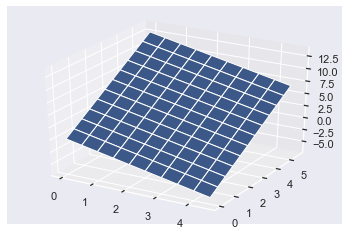

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, s=100)
plot_contours(ax, lm, xx, yy)

# D = 3, N = 1

In [27]:
X,y = create_dataset(np.array([[3,4,5,6]]))

In [28]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [29]:
lm.coef_

array([[0.36, 0.48, 0.6 ]])

In [30]:
X,y = create_dataset(np.array([[3,4,5,6],[1,2,3,4]]))

In [31]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [32]:
lm.coef_

array([[-0.66666667,  0.33333333,  1.33333333]])

In [33]:
X,y = create_dataset(np.array([[3,4,5,6],[1,2,3,4],[9,3,1,-4]]))

In [34]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [35]:
lm.coef_

array([[-0.75,  0.5 ,  1.25]])

eq1, eq2, eq3

-416x_1^2 - 182yx_2 + 112x_1x_2 + 760x_3x_2 - 300x_3^2 + 49yx_1 + 105yx_3 - 140x_1x_3 = -.75(49x_1^2 - 364x_2x_1 + 210x_3x_1 + 676x_2^2 + 225x_3^2 - 780x_2x_3)

-112x_1^2 - 182yx_1 + 416x_2x_1 + 40x_3x_1 + 600x_3^2 + 676yx_2 - 390yx_3 - 1040x_2x_3 = .5(49x_1^2 - 364x_2x_1 + 210x_3x_1 + 676x_2^2 + 225x_3^2 - 780x_2x_3)

140x_1^2 + 105yx_1 - 800x_2x_1 + 300x_3x_1 + 1040x_2^2 - 390yx_2 + 225yx_3 - 600x_2x_3 = 1.25(49x_1^2 - 364x_2x_1 + 210x_3x_1 + 676x_2^2 + 225x_3^2 - 780x_2x_3)

expand inv ({{x_1,1,9},{x_2,2,3},{x_3,3,1}} . {{x_1,x_2,x_3},{1,2,3},{9,3,1}}) . ({{x_1,1,9},{x_2,2,3},{x_3,3,1}} . {{y},{4},{-4}}) = {{-.75},{.5},{1.25}}

## use mathematica maybe

## D=1, N=2, no intercept, n is known

In [36]:
X,y = create_dataset(np.array([[1,5],[2,3]]))

In [37]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [38]:
lm.coef_

array([[2.2]])

In [39]:
X,y = create_dataset(np.array([[1,5],[2,3],[6,2]]))

In [40]:
lm = LinearRegression(fit_intercept=False)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [41]:
lm.coef_

array([[0.56097561]])

In [42]:
2.2 - 0.56097561

In [43]:
12 - (36*0.56097561)

In [46]:
x_1, x_2, y_1, y_2, theta = symbols('x^{(1)} x^{(2)} y^{(1)} y^{(2)} \Theta')

In [45]:
X = Matrix([x_1, x_2]).T
y = Matrix([y_1, y_2 ])
XT = X.T
XTX = X*XT
XTX_inv = XTX**-1
Xy = X*y
XTX_inv * Xy

⎡x__{(1)}⋅y__{(1)} + x__{(2)}⋅y__{(2)}⎤
⎢─────────────────────────────────────⎥
⎢                2           2        ⎥
⎣        x__{(1)}  + x__{(2)}         ⎦

### figure out how to solve, either eqn form or matrix form.

In [53]:
left = XTX_inv * Xy

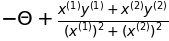

In [55]:
left[0] - theta

In [52]:
Matrix([theta])

[\Theta]